Name: Perez, Cris John M.<br>
Course and Section: CPE 019 - CPE32S9<br>
Date of Submission: February 21, 2024<br>
Instructor: Engr. Roman Rirchard<br>

## **Part 1: Do the following objectives**

Part 1.1 Import the Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

testing = pd.read_csv('/content/titanic_test.csv')
training = pd.read_csv('/content/titanic_train.csv')

In [5]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Part 1.2: Plot the data

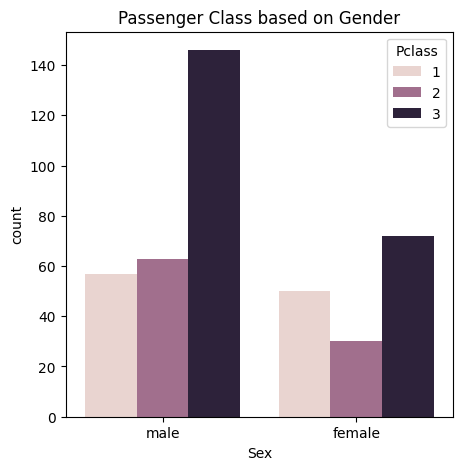

In [16]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Sex', hue = 'Pclass', data = testing)
plt.title('Passenger Class based on Gender')
plt.show()

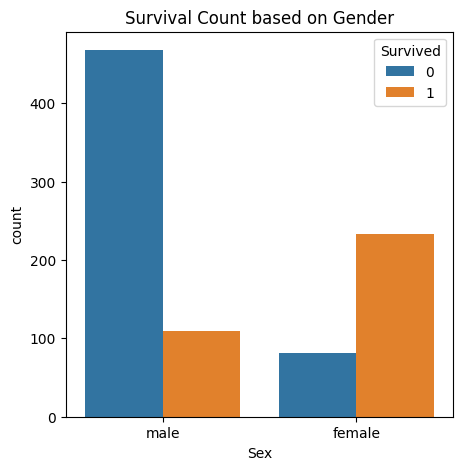

In [17]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Sex', hue = 'Survived', data = training)
plt.title('Survival Count based on Gender')
plt.show()

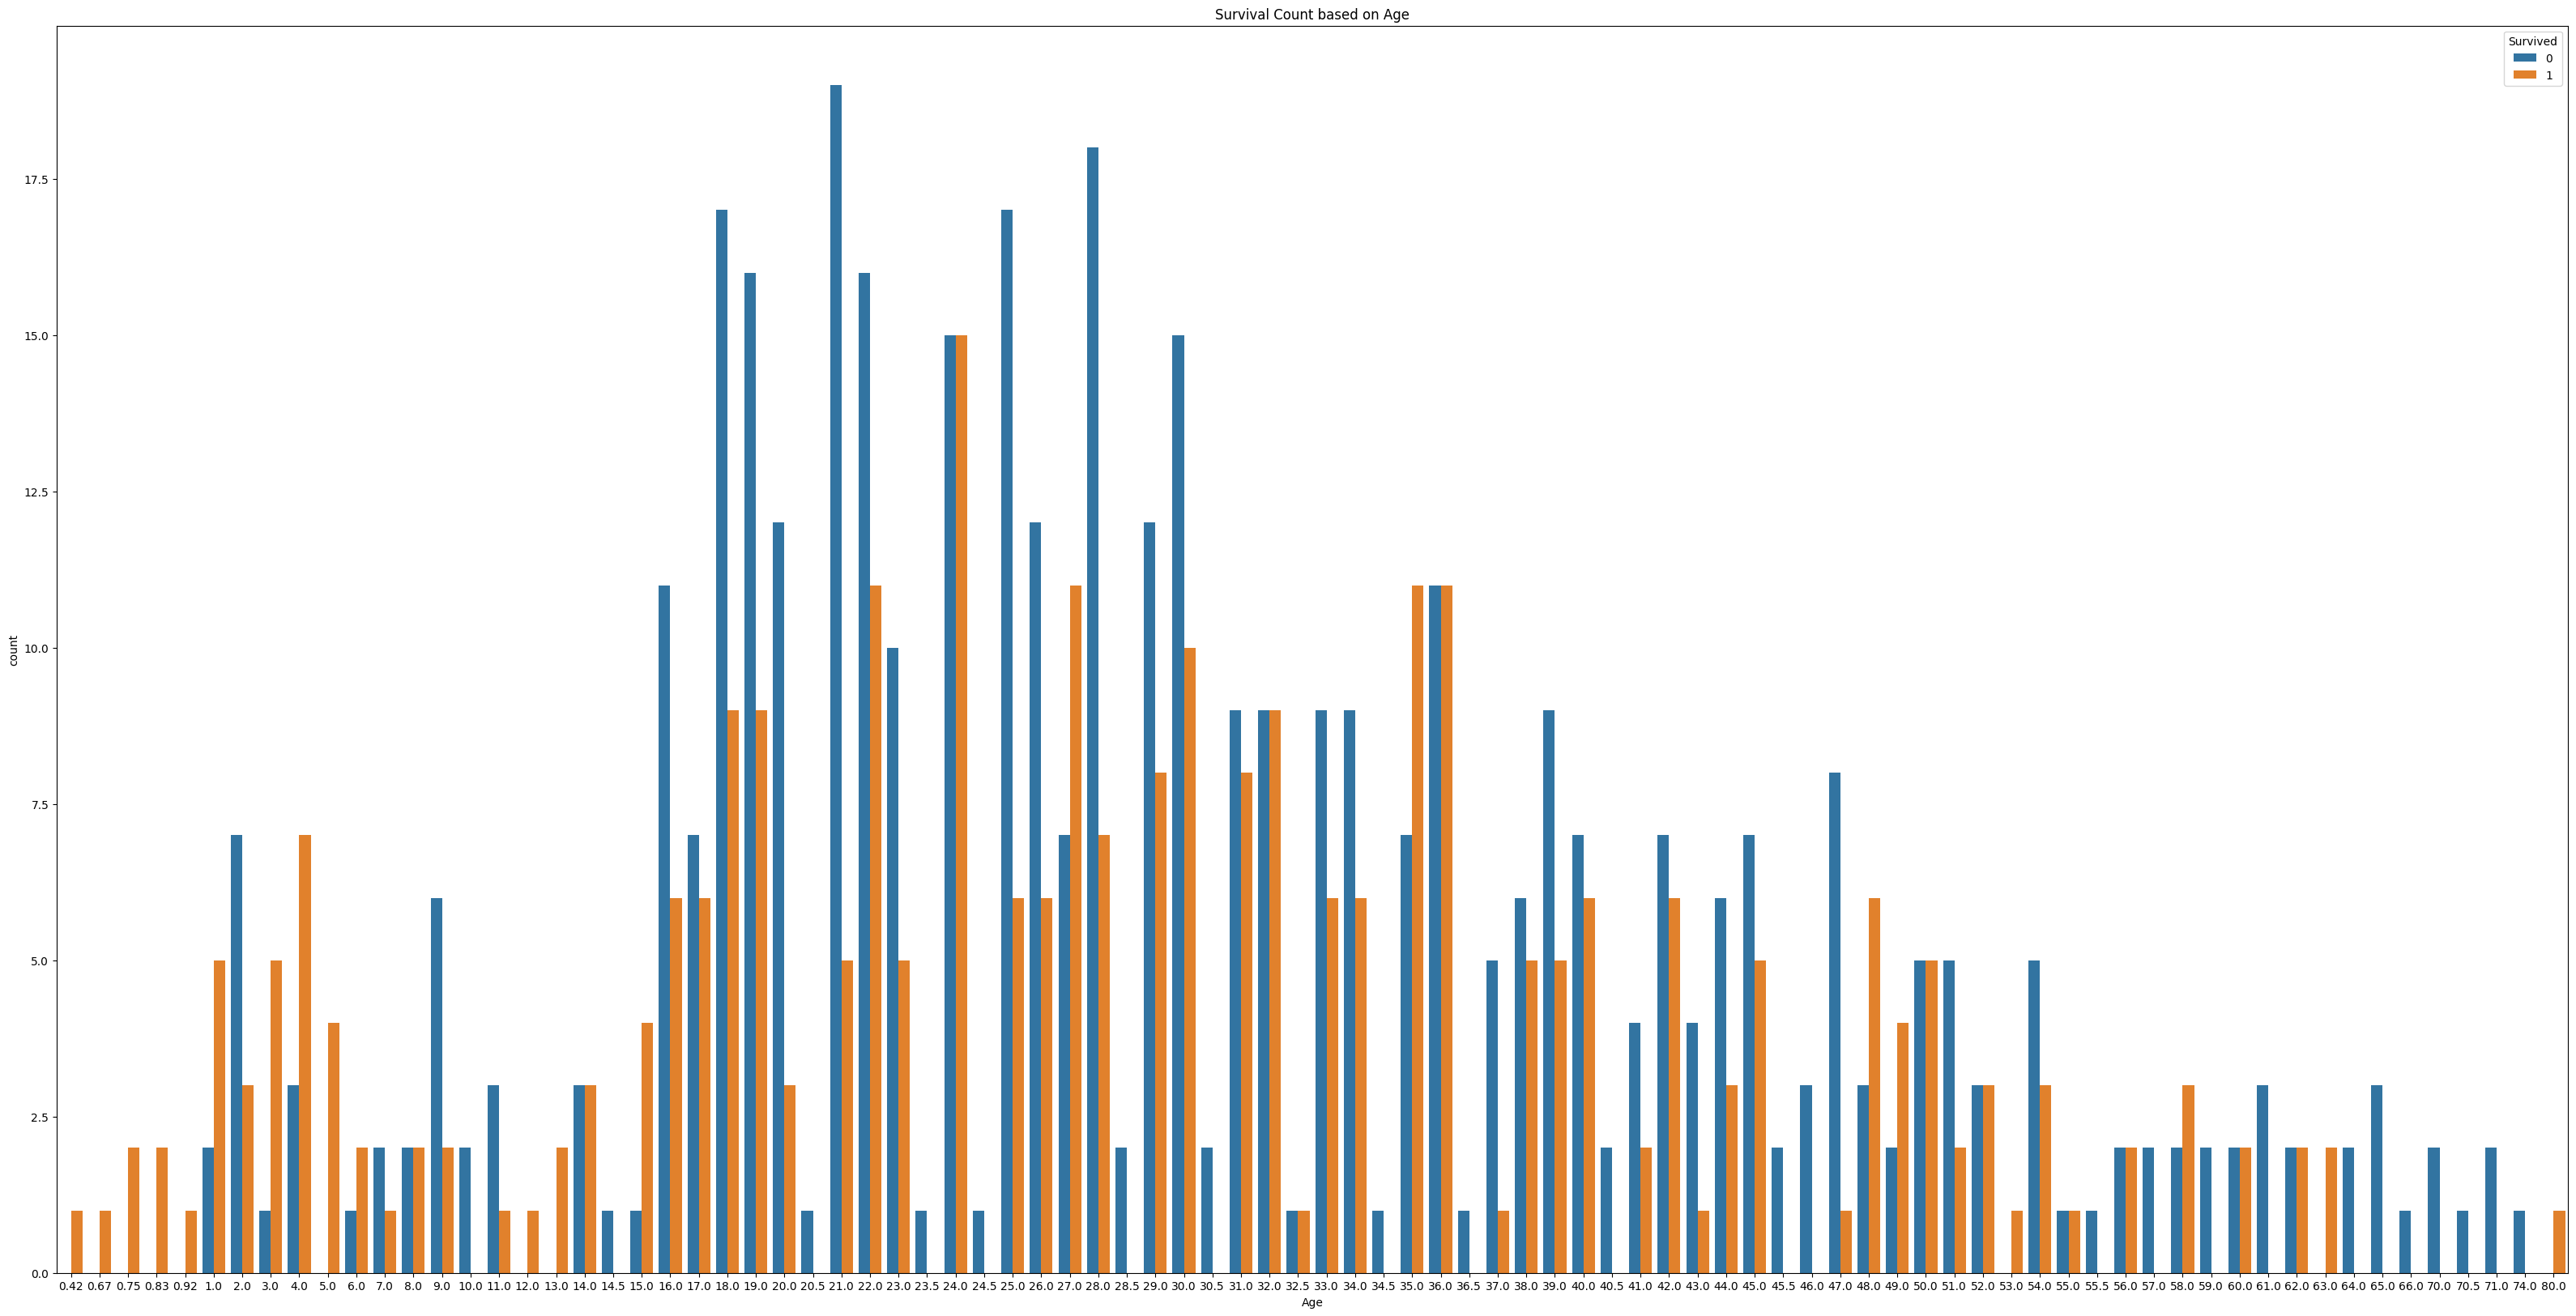

In [23]:
plt.figure(figsize = (40,20))
sns.countplot(x = 'Age', hue = 'Survived', data = training)
plt.title('Survival Count based on Age')
plt.show()

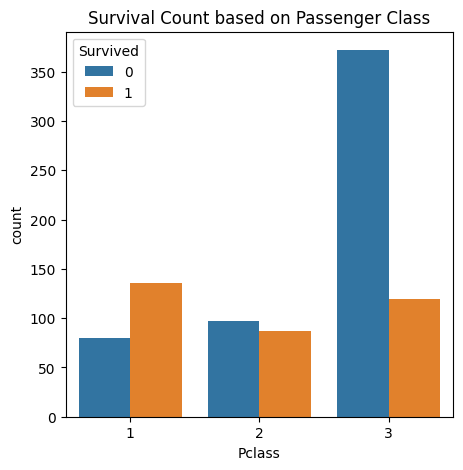

In [26]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Pclass', hue = 'Survived', data = training)
plt.title('Survival Count based on Passenger Class')
plt.show()

Part 1.3: Perform Simple Linear Regression on the SURVIVAL feature column (you can check the internet on how you can perform simple linear regression)

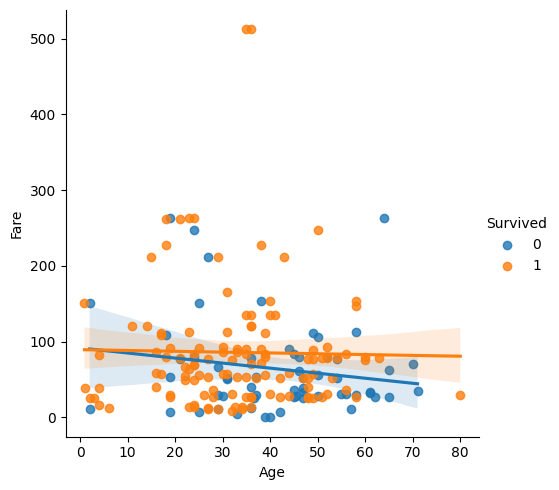

In [30]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state

training = training.dropna()
x_input = training[["Age","Fare"]]
y_target = training["Survived"]
model = LinearRegression()
model.fit(x_input,y_target)
sns.lmplot(x = 'Age', y = 'Fare', hue = 'Survived', data = training, fit_reg = True)
plt.show()

## **Part 2: Decision Tree Classification**

#### **Part 2.1: Create a Decision Tree Classifier**

With the data above, what kinds of questions can we ask about the factors that contributed to passengers surviving or perishing in the Titanic disaster?<br><br>

Answer:

We could ask questions like:
*   Which passenger ticket class do they belong?
*   What is their cabin number?
*   How many siblings or spouse are they travelling with?
*   How many parents or children are they travelling with?
* What is their port of embarkation?
* How old are the survivors?
* How old are the victims?





Step 1: Create the dataframe

In [ ]:
#Code cell 1
import pandas as pd
training = pd.read_csv('/titanic_train.csv')

In [ ]:
#Code cell 2
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Are there missing values in the data set? <br>

Answer: Yes, some of the columns has less than 891 non-null counts which means that they are missing some values. Also, some of the column names were named differently like "Sex" instead of "Gender".

In [ ]:
#code cell 3
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Prepare the Data for the Decision Tree Model

In [ ]:
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [ ]:
#code cell 5
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [ ]:
#code cell 7
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


What is the value that was used to replace the missing ages?

In [ ]:
training.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
training.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,370376,7.75,NaN,Q


Step 3: Train and Score the Decision Tree Model

In [ ]:
#code cell 8
y_target = training["Survived"].values

In [ ]:
#code cell 9
columns = ["Fare","Pclass","Sex","Age","SibSp"]
x_input = training[list(columns)].values

In [43]:
#code cell 10
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(x_input,y_target)

In [ ]:
#code cell 11
clf_train.score(x_input,y_target)

0.8226711560044894

Step 4: Visualize the tree

In [ ]:
#code cell 12
from six import StringIO

with open('/titanic.dot','w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [ ]:
!apt install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
#code cell 13
!dot -Tpng /titanic.dot -o /titanic.png

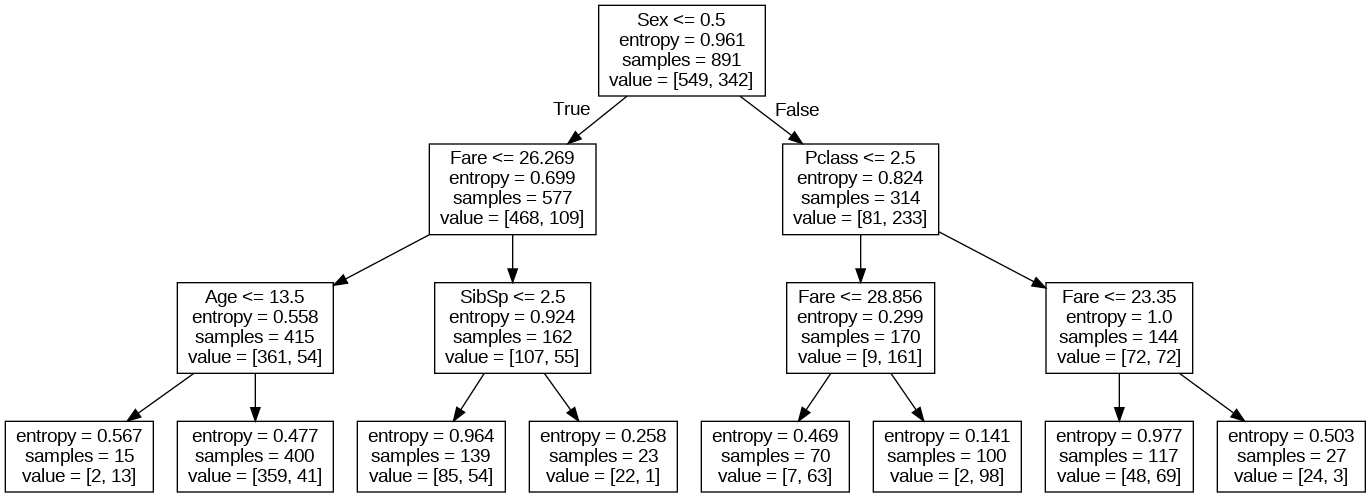

In [ ]:
#code cell 14
from IPython.display import Image

Image('/titanic.png')

What describes the grup that had the most deaths by number? Which grup had the most survivors?<br><br>

Answer: The group that had the most deaths was people who were older than 13.5 and the group that had the most survivors was the people who paid a fare greater than 28.856. If we classify them by gender, 81% of the Male population died while only 26% of the Female population died.

#### **Part 2.2: Apply the Decision Tree Model**

Step 1: Import and Prepare the Data

In [31]:
#code cell 15
testing = pd.read_csv('/content/titanic_test.csv')

In [32]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


How many records are in the data set?

Answer: 418

Which important variables(s) are missing values and how many are missing?

Answer: Age is missing 86, Fare is missing 1 and Cabin is missing 327

In [33]:
#code cell 16
#replace the Gender labels in the testing dataframe
testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [34]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [35]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
#methods from here, by entering and running one and then the other.
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [37]:
testing.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


Step 2: Label the testing dataset

In [47]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
columns = ["Sex","Age"]
X_input = testing[list(columns)].values

In [48]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object
target_labels = clf_train.predict(X_input)
#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})
#display the first few rows of the data set
testing.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [51]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("/content/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) /float(len(testing_results))
# Print the result
testing.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


#### **Part 2.3: Evaluate the Decision Tree Model**

Step 1: Import the data

In [52]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("/content/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


How many records are in the data set?

Answer: 1308

Which important variables(s) are missing values and how many are missing?

Answer: Age is missing 263

Step 2: Prepare the Data

In [54]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [55]:
#code cell 24
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)
#display the first few rows of the data set
all_data.head(10)

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500
5,1,1,0,48.0000,0,26.5500
6,1,1,1,63.0000,1,77.9583
7,0,1,0,39.0000,0,0.0000
8,1,1,1,53.0000,2,51.4792
9,0,1,0,71.0000,0,49.5042


Step 2: Create the input and output variables for the training and testing data

In [58]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split
#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
columns = ["Gender","Age"]
X = all_data[list(columns)].values
y = all_data["Survived"].values
#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [59]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [60]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.7920918367346939 Testing score = 0.7748091603053435


## **Conclusions and Lessons Learned**

In this laboratory activity, we were tasked to perform sinple linear regression and decision tree classification on the given data sets. I have observed from this activity that there could be a correlation between data and that data analysis could be done in many ways through different statistical models. I conclude from this activity that data advanced data analysis could be more than just the plotting but more of an understanding of the given data.